Neste ultimo projeto, iremos analisar dados do mercado imobiliario. Nossa tarefa sera determinar o preco de mercado de uma casa com base em um conjunto de caracteristicas. Vamos analisar e prever o preco das casas usando atributos como tamanho da casa, numero de quartos, numero de comodos, etc.

# Sobre o dataset
Contem preco de casas a venda do Condado de King, que inclui Seattle. Inclui dados de casas vendidas entre maio de 2014 e maio de 2015. Os dados podem ser encontrados [neste link](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

O __dicionario das variaveis segue abaixo.__

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |

# Importacao das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Importacao dos dados

In [2]:
df = pd.read_csv('kc_house_data_NaN.csv')

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Questao 01
Exibir os tipos de dados para cada coluna usando a funcao __dtypes__.

In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Obter estatisticas descritivas

In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Questao 02
Remover as colunas "id" e "Unnamed: 0" do eixo 1 usando o metodo __drop__, depois disso, usar o metodo __describe__ para obter novas estatisticas descritivas.

In [6]:
df.drop(['Unnamed: 0', "id"], axis=1, inplace=True)

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Verificar os nulos

In [8]:
print(df.isnull().sum())

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64


Substituir os valores nulos das variaveis "bedrooms" e "bathrooms" com suas respectivas medias.

In [9]:
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mean(), inplace=True)

Verificar os nulos novamente

In [10]:
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Questao 03
Usar o metodo __value_counts__ para contar o numero de casas com numero unico de pisos, usar o metodo _to_frame_ para converter em dataframe.

In [14]:
df.value_counts(df['floors']).to_frame(name="Number of houses with unique floors")

,Number of houses with unique floors
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


## Questao 04
Usar a funcao __boxplot__ para determinar se casas com visao para o mar ou sem visao para o mar tem outliers.

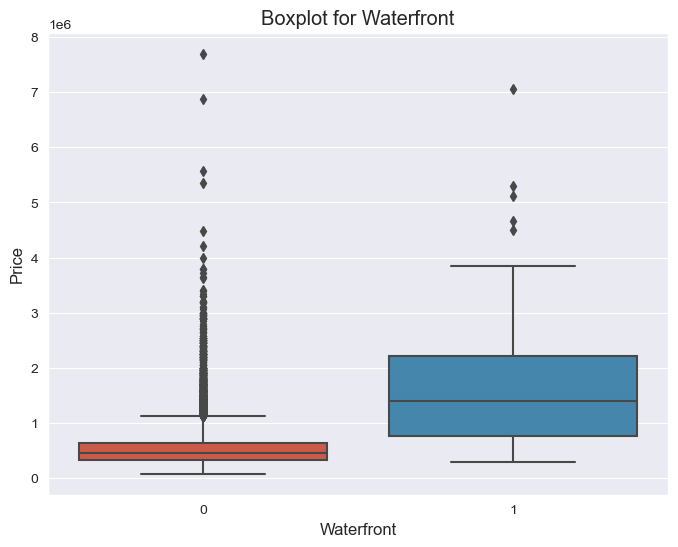

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title("Boxplot for Waterfront")
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.show();

## Questao 05
Usar a funcao __regplot__ para determinar se a variavel _sqft_above_ eh negativamente ou positivamente correlacionada com a variavel _price_.

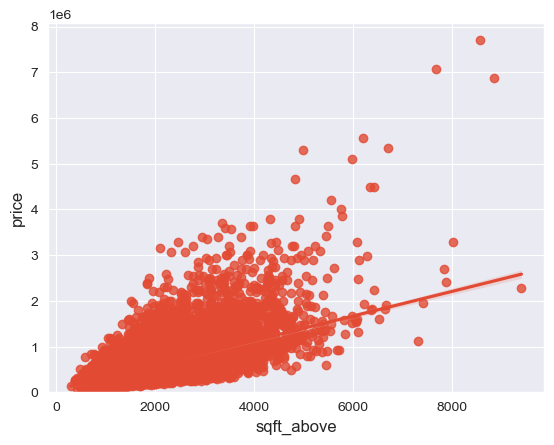

In [18]:
sns.regplot(df, x="sqft_above", y="price")
plt.ylim(0,)
plt.show();

Correlacao entre as variaveis com a variavel Price

In [21]:
# Seleciona apenas colunas numericas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular a correlacao
correlation = df_numeric.corr()['price'].sort_values()

print(correlation)

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


# Desenvolvimento do modelo

In [22]:
x = df[['long']]
y = df['price']
lr = LinearRegression()
lr.fit(x, y)
lr.score(x, y)

0.00046769430149029567

# Questao 06
Ajustar uma regressao linear para prever o 'price' usando a variavel _sqft_living_, depois calcular o R2.

In [25]:
x = df[['sqft_living']]
y = df['price']
lr = LinearRegression()
lr.fit(x, y)
print(r2_score(y, lr.predict(x)))

0.4928532179037931


# Questao 07
Ajustar uma regressao linear para prever a variavel 'price' usando as seguintes variaveis: "floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living".

In [26]:
features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
x = df[features]
y = df['price']
lr = LinearRegression()
lr.fit(x, y)
print(r2_score(y, lr.predict(x)))

0.6576926701831082


# Questao 08
Criar um pipeline para prever a variavel 'price', ajustar o modelo usando as caracteristicas na varaivel "features", e calcular o R2.

In [27]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [28]:
pipe = Pipeline(Input)
pipe.fit(x, y)
ypipe = pipe.predict(x)
print(r2_score(y, ypipe))

0.751331838617503


# Avaliacao e ajuste do modelo

In [29]:
# Dividir os dados em treino e teste.
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

x = df[features]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


# Questao 09
Criar uma regressao Ridge usando os dados de treino, definir a regularizacao como 0.1, e calcular o R2 nos dados de teste.

In [30]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
yhat = ridge.predict(x_test)
print(r2_score(y_test, yhat))

0.6478759163939101


# Questao 10
Realizar uma regressao polinomial de ordem 2 nos dados de treino e teste. Criar uma regressao ridge com os dados de treino, definir a regularizacao como 0.1, e calcular o R2 nos dados de teste.

In [31]:
pl = PolynomialFeatures(degree=2)
x_train_pl = pl.fit_transform(x_train)
x_test_pl = pl.fit_transform(x_test)
ridge.fit(x_train_pl, y_train)
yhat = ridge.predict(x_test_pl)
print(r2_score(y_test, yhat))

0.7002744273154118
